## First, let's install and import the libraries.(The libraries are already installed on my end, but if they are not on yours, please install the missing libraries first.)

In [1]:
import numpy as np  # Linear algebra, for mathematical computations
import pandas as pd  # Data processing, for reading CSV files (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Visualization, for creating plots and graphs
import seaborn as sns  # Visualization, for creating heatmaps and advanced plots
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation, error metrics, and R-squared
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the train and test datasets
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')

# Display the first few rows to understand the structure of the data
print(train.head())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [3]:
# Check for missing values in the train dataset
missing_values = train.isnull().sum()

# Display the columns with missing values
print(missing_values)


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## Now that we know there are no missing values, we can proceed to the next steps.

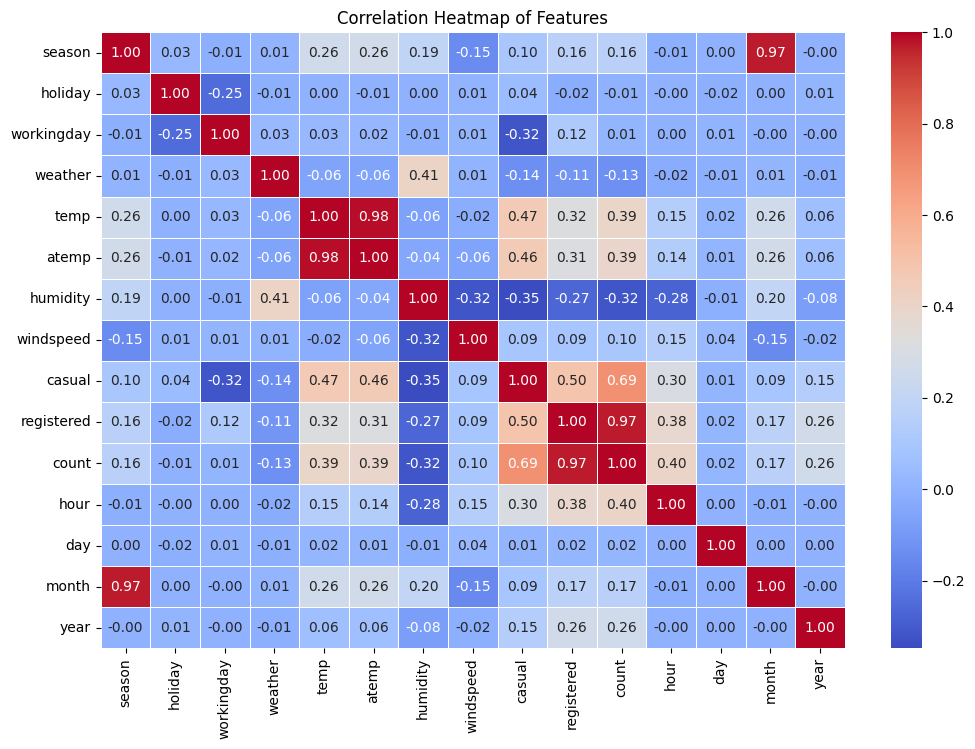

In [4]:
# Convert 'datetime' to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

# Extract relevant features (hour, day, month, year)
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

# Now, drop the original 'datetime' column and recalculate the correlation
train = train.drop(columns=['datetime'])

# Calculate the correlation matrix again
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


## Now that we've seen the dependencies, we can move on to the training part.

In [5]:
# Split the dataset into features and target
X = train.drop(columns=['count'])  # Features (everything except 'count')
y = train['count']  # Target variable (the 'count' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# Print the evaluation results
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R-squared: {rf_r2}')


Random Forest Mean Squared Error: 9.695146097337009
Random Forest R-squared: 0.9997062694296441


## After training the Random Forest model and evaluating it, we can see that the model performs exceptionally well with an R-squared value of 0.9997. This indicates that the model's predictions are very close to the actual values, which is a great result. Additionally, the Mean Squared Error (MSE) is very low at 9.695, further suggesting that the model's error is minimal. Overall, this model demonstrates strong predictive power for the given dataset.

## As someone new to this field, I am pleased with the performance, but I am aware that further optimization and evaluation using different models could potentially improve the results even more. Looking forward to exploring more complex techniques in future projects.